<a href="https://colab.research.google.com/github/diego2017003/reducao_dimensionalidade/blob/main/Reducao_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Redução de dimensionalidade**
---
Inicialmente iremos importar as bibliotecas do python que serão utilizadas e posteriormente trazer as bases de dados para o projeto. As 3 base de dados utilizadas nessa prática foram retiradas do keggle no [link](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018) . Os 3 são referentes a mais de 200 indicadores econômicos para as ações dos estados unidos de 2014 a 2018. Para tratamento dos dados utilizaremos o scikit-learn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
dados_2014 = pd.read_csv('https://raw.githubusercontent.com/diego2017003/reducao_dimensionalidade/main/2014_Financial_Data.csv?token=AHICD523X23BWXIGHY6DLE3A27CAE')
dados_2015 = pd.read_csv('https://raw.githubusercontent.com/diego2017003/reducao_dimensionalidade/main/2015_Financial_Data.csv?token=AHICD523AFQJE3OLANEZVGLA27CL2')
dados_2016 = pd.read_csv('https://raw.githubusercontent.com/diego2017003/reducao_dimensionalidade/main/2016_Financial_Data.csv?token=AHICD56N5R6HTR4RUGP4PGLA27CN2')

In [3]:
dados_2014.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,3.742000e+03,3.659000e+03,3.659000e+03,3.785000e+03,3.659000e+03,3.793000e+03,3.736000e+03,3.724000e+03,3.572000e+03,3.698000e+03,3659.000000,3761.000000,3606.000000,3758.000000,3607.000000,3649.000000,3.744000e+03,3.804000e+03,3.785000e+03,3761.000000,3751.000000,3.750000e+03,2.875000e+03,2.878000e+03,3.749000e+03,3.693000e+03,2.937000e+03,3.720000e+03,3.773000e+03,2.896000e+03,...,3502.000000,3027.000000,3502.000000,3.615000e+03,3.590000e+03,3577.000000,3577.000000,3577.000000,3565.000000,3526.000000,3515.000000,3472.000000,2759.000000,3571.000000,3576.000000,3570.000000,2261.000000,2771.000000,3075.000000,2272.000000,2777.000000,3082.000000,2261.000000,2771.000000,3075.000000,2223.000000,2744.000000,3012.000000,2343.000000,2856.000000,3208.000000,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3.808000e+03,3808.000000
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,1.762750e+08,1.557750e+07,-3.453915e+06,4.894335e+08,5.343177e+06,4.839166e+08,-2.607365e+04,-2.653476e+04,2.865321e+08,2.904988e+08,3.413530,0.469036,-4.612215,-3.736484,-5.102894,-3.229727,1.041692e+09,7.782098e+08,5.051208e+08,-4.039696,-3.784724,1.615347e+09,2.612956e+08,8.496238e+08,9.615113e+08,4.866494e+08,3.111922e+09,2.941115e+09,1.664754e+09,4.245599e+08,...,48.114703,5.164910,27.891355,1.941584e+03,-1.516578e+04,95.342800,3.631871,3.855939,-0.426786,0.164305,0.140394,1.824807,2.192586,0.160613,-1.341505,-23.892636,0.031811,0.043491,0.046010,0.044151,0.057456,0.067409,0.038966,0.069918,0.088356,0.045218,0.057705,0.065999,-0.019197,0.006783,0.036206,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,1.011342e+09,1.620427e+08,2.360399e+08,4.396692e+09,6.760107e+07,4.392279e+09,1.672636e+06,1.673673e+06,2.304823e+09,2.403028e+09,167.005657,1.061432,82.473116,63.214487,90.142740,54.458512,6.057032e+09,5.32900

Visualizando as caracteristicas da base

In [4]:
dados_2014.mean()

Revenue                 5.879050e+09
Revenue Growth          1.295424e+01
Cost of Revenue         3.700973e+09
Gross Profit            2.188214e+09
R&D Expenses            9.401830e+07
                            ...     
Debt Growth             1.361780e+00
R&D Expense Growth      5.965290e-01
SG&A Expenses Growth    3.822844e-01
2015 PRICE VAR [%]      9.751560e+02
Class                   4.290966e-01
Length: 223, dtype: float64

In [5]:
dados_2014.median()

Revenue                 4.349010e+08
Revenue Growth          6.185000e-02
Cost of Revenue         1.414420e+08
Gross Profit            1.908760e+08
R&D Expenses            0.000000e+00
                            ...     
Debt Growth             0.000000e+00
R&D Expense Growth      0.000000e+00
SG&A Expenses Growth    6.880000e-02
2015 PRICE VAR [%]     -5.281842e+00
Class                   0.000000e+00
Length: 223, dtype: float64

Visualizando que os datasets possuem muitos valores faltantes optamos por não retirar esses registros, caso contrário perderiamos mais que 50% dos dados.Em contrapartida, analisamos os valores de média e mediana das colunas e subztituimos os valores faltantes pela média já que ela parece mais representativa da natureza dos dados trabalhados.

In [6]:
dados_2014.fillna(dados_2014.mean(),inplace=True)

In [7]:
#a = []
#for i in dados_2014.columns:
#  if i not in dados_2014.describe().columns:
#    a.append(i)
#print(a)

Identificamos que existiam atributos categóricos multivalorados que poderiam dificultar o tratamento de dados númericos. Devido a quantidade de categorias ser muito alta não foi viável utilizar a técnica de "one hot encoding", e devido a não especialidade no campo dos dados não foi possível tratar esses campos com a técnica de "on label encoding". Devido a isso optamos por retirar esses atributos do dataset. Vale salientar que essas observações foram feitas nas 3 bases e consequantemente as operações serão feitas nas 3.

In [8]:
dados_2014.drop(columns=['Unnamed: 0', 'Sector'],inplace=True)

In [9]:
dados_2015.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
count,4.053000e+03,3780.000000,3.927000e+03,4.055000e+03,3.855000e+03,3.950000e+03,3.946000e+03,4.078000e+03,3.945000e+03,4.017000e+03,3.969000e+03,3.833000e+03,3.833000e+03,3.955000e+03,3.833000e+03,4.001000e+03,4.024000e+03,4.030000e+03,4.003000e+03,3.870000e+03,3833.000000,4047.000000,3779.000000,3946.000000,3779.000000,3827.000000,3.922000e+03,3.998000e+03,3.954000e+03,4049.000000,3929.000000,4.055000e+03,3.883000e+03,3.945000e+03,4.077000e+03,3.932000e+03,3.921000e+03,3.965000e+03,4.001000e+03,3.913000e+03,...,3728.000000,3212.000000,3727.000000,3.816000e+03,3.786000e+03,3806.000000,3802.000000,3806.000000,3773.000000,3735.000000,3723.000000,3688.000000,3.031000e+03,3775.000000,3805.000000,3774.000000,2383.000000,2906.000000,3301.000000,2394.000000,2913.000000,3308.000000,2383.000000,2906.000000,3301.000000,2354.000000,2868.000000,3253.000000,2474.000000,3016.000000,3445.000000,3752.000000,3751.000000,3751.000000,3662.000000,3721.000000,3769.000000,3773.000000,4120.000000,4120.000000
mean,5.005532e+09,0.289257,3.194520e+09,1.884870e+09,9.605866e+07,8.390737e+08,1.358340e+09,5.072675e+08,9.448146e+07,4.072179e+08,-6.935557e+07,1.205551e+07,-5.747318e+06,3.258953e+08,4.079439e+06,3.221031e+08,-2.339272e+04,-2.335794e+04,2.590582e+08,2.658988e+08,0.823623,0.471515,-10.390579,-11.486417,-10.892615,-9.213656,8.568633e+08,5.346241e+08,3.363523e+08,-11.277719,-11.232131,1.578439e+09,2.081732e+09,4.091726e+09,8.945641e+08,4.610627e+08,5.798438e+09,2.689576e+09,1.556471e+09,3.857010e+09,...,64.003746,6.139494,28.252535,2.163508e+03,-1.071385e+04,0.203453,-0.678828,-0.831438,-3.168248,-0.378635,-0.399500,4.776951,1.130850e+03,0.166804,-0.424178,1.338964,0.024890,0.033505,0.033408,0.042289,0.047166,0.060212,0.030086,0.059808,0.073613,0.038542,0.041870,0.066126,-0.019489,0.013276,0.012775,0.524476,0.143941,0.428794,1.982999,2.834435,0.294680,0.313609,103.077642,0.701699
std,3.455765e+10,3.579223,2.837197e+10,8.398565e+09,6.755995e+08,3.487307e+09,5.194782e+09,2.774280e+09,5.302102e+08,2.427021e+09,1.173891e+10,1.352134e+08,2.765625e+08,2.294821e+09,4.412738e+07,2.280282e+09,1.213270e+06,1.212367e+06,2.076529e+09,2.234825e+09,10.200956,1.432205,224.090399,249.688662,231.811094,226.293061,4.775451e+0

In [10]:
dados_2015.fillna(dados_2015.mean(),inplace=True)

In [11]:
dados_2015.drop(columns=['Unnamed: 0', 'Sector'],inplace=True)

In [12]:
dados_2015.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
count,4.120000e+03,4120.000000,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4.120000e+03,4.120000e+03,4.120000e+03,4120.000000,4120.000000,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,4.120000e+03,...,4120.000000,4120.000000,4120.000000,4.120000e+03,4.120000e+03,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4.120000e+03,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000
mean,5.005532e+09,0.289257,3.194520e+09,1.884870e+09,9.605866e+07,8.390737e+08,1.358340e+09,5.072675e+08,9.448146e+07,4.072179e+08,-6.935557e+07,1.205551e+07,-5.747318e+06,3.258953e+08,4.079439e+06,3.221031e+08,-2.339272e+04,-2.335794e+04,2.590582e+08,2.658988e+08,0.823623,0.471515,-10.390579,-11.486417,-10.892615,-9.213656,8.568633e+08,5.346241e+08,3.363523e+08,-11.277719,-11.232131,1.578439e+09,2.081732e+09,4.091726e+09,8.945641e+08,4.610627e+08,5.798438e+09,2.689576e+09,1.556471e+09,3.857010e+09,...,64.003746,6.139494,28.252535,2.163508e+03,-1.071385e+04,0.203453,-0.678828,-0.831438,-3.168248,-0.378635,-0.399500,4.776951,1.130850e+03,0.166804,-0.424178,1.338964,0.024890,0.033505,0.033408,0.042289,0.047166,0.060212,0.030086,0.059808,0.073613,0.038542,0.041870,0.066126,-0.019489,0.013276,0.012775,0.524476,0.143941,0.428794,1.982999,2.834435,0.294680,0.313609,103.077642,0.701699
std,3.427544e+10,3.428320,2.769929e+10,8.332034e+09,6.535056e+08,3.414584e+09,5.083876e+09,2.760100e+09,5.188247e+08,2.396483e+09,1.152173e+10,1.304177e+08,2.667535e+08,2.248388e+09,4.256229e+07,2.247101e+09,1.199048e+06,1.199049e+06,2.046824e+09,2.165943e+09,9.839153,1.419457,214.614140,244.357925,222.008344,218.096062,4.659260e+09

In [13]:
dados_2016.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,4.201000e+03,4.059000e+03,4.059000e+03,4.191000e+03,4.059000e+03,4.239000e+03,4.275000e+03,4.282000e+03,4.270000e+03,4.107000e+03,4059.000000,4298.000000,4003.000000,4176.000000,4003.000000,4052.000000,4.154000e+03,4.233000e+03,4.190000e+03,4300.000000,4160.000000,4.304000e+03,4.155000e+03,4.213000e+03,4.331000e+03,4.160000e+03,4.182000e+03,4.194000e+03,4.236000e+03,4.166000e+03,...,4133.000000,3455.000000,4049.000000,4.051000e+03,4.029000e+03,4163.000000,4078.000000,4168.000000,4045.000000,4126.000000,4126.000000,3929.000000,3967.000000,4025.000000,4145.000000,4022.000000,2524.000000,3117.000000,3524.000000,2537.000000,3125.000000,3534.000000,2524.000000,3117.000000,3524.000000,2511.000000,3056.000000,3494.000000,2587.000000,3252.000000,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4.797000e+03,4797.000000
mean,4.802586e+09,1.520193,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,8.904592e+07,1.106268e+07,-3.942755e+06,3.095961e+08,4.910822e+06,3.127112e+08,-5.501432e+03,-5.531801e+03,2.440547e+08,2.525574e+08,0.639183,0.506767,-9.934873,-7.218768,-10.318034,-5.752914,8.441486e+08,5.248434e+08,3.205348e+08,-7.177532,-7.312726,2.024683e+09,1.650333e+09,3.556123e+09,8.646584e+08,4.445058e+08,5.687937e+09,2.630528e+09,1.682162e+09,3.246442e+09,...,31.626292,5.409975,24.973797,7.046368e+02,-3.186481e+04,4.609662,0.876871,0.178273,-0.499796,-0.233608,-0.235448,0.747963,0.983154,0.116449,197.376282,0.396249,0.019341,0.019687,0.046158,0.036223,0.046602,0.060894,0.024748,0.047038,0.058778,0.030496,0.033344,0.035920,-0.025204,0.003764,0.005076,0.812488,0.185010,0.583518,0.759701,2.593773,0.149195,0.252307,3.650260e+02,0.670836
std,3.261058e+10,52.397806,2.705305e+10,7.913180e+09,7.347024e+08,3.465465e+09,4.930970e+09,2.548440e+09,4.355067e+08,2.190013e+09,2.207093e+09,1.386278e+08,3.077208e+08,1.683678e+09,5.914561e+07,1.708082e+09,2.550796e+05,2.548572e+05,1.779103e+09,1.953756e+09,4.313618,0.716412,202.331671,124.580825,203.025465,97.429042,3.589538e+09,2.31165

In [14]:
dados_2016.fillna(dados_2016.mean(),inplace=True)

In [15]:
dados_2016.drop(columns=['Unnamed: 0', 'Sector'],inplace=True)

In [16]:
dados_2016.describe().round(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.797000e+03,4797.00,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4797.00,4797.00,4.797000e+03,4.797000e+03,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4.797000e+03,4.797000e+03,4.797000e+03,4797.00,4797.00,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,...,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00
mean,4.802586e+09,1.52,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,8.904592e+07,1.106268e+07,-3.942755e+06,3.095961e+08,4.910822e+06,3.127112e+08,-5501.43,-5531.80,2.440547e+08,2.525574e+08,0.64,0.51,-9.93,-7.22,-10.32,-5.75,8.441486e+08,5.248434e+08,3.205348e+08,-7.18,-7.31,2.024683e+09,1.650333e+09,3.556123e+09,8.646584e+08,4.445058e+08,5.687937e+09,2.630528e+09,1.682162e+09,3.246442e+09,...,31.63,5.41,24.97,704.64,-31864.81,4.61,0.88,0.18,-0.50,-0.23,-0.24,0.75,0.98,0.12,197.38,0.40,0.02,0.02,0.05,0.04,0.05,0.06,0.02,0.05,0.06,0.03,0.03,0.04,-0.03,0.00,0.01,0.81,0.19,0.58,0.76,2.59,0.15,0.25,365.03,0.67
std,3.090341e+10,48.72,2.518340e+10,7.496311e+09,6.778937e+08,3.236427e+09,4.601220e+09,2.421748e+09,4.063830e+08,2.065221e+09,2.065407e+09,1.275166e+08,2.830566e+08,1.573716e+09,5.440501e+07,1.605645e+09,240798.25,240785.25,1.678513e+09,1.807758e+09,3.97,0.68,184.83,116.24,185.46,89.54,3.340257e+09,2.171477e+09,1.593025e+09,118.06,114.42,2.300859e+10,2.001398e+10,3.342521e+10,7.331361e+09,6.342277e+09,4.594528e+10,1.677070e+10,7.658938e+09,3.286843e+10,...,827.09,20.84,136.25,41190.83,1103711.32,140.48,33.91,11.69,41.40,31.92,31.89,18.45,19.16,2.56,8421.32,33.53,0.11,0.18,0.72,0.08,0.15,0.29,0.08,0.16,0.29,0.10,0.14,0.28,0.17,0.19,0.25,19.99,3.55,12.98,82.70,49.60,3.29,3.07,19401.49,0.47
min,-3.819270e+08,-12.77,-2.639031e+09,-3.564190e+09,-8.610000e

Agora que completamos os campos faltantes com a média. Observamos que todos os atributos possuem o mesmo número de registros e as caracteristicas de distribuição do dados. Observamos também valores de outliers, entretanto não pudemos remover esses registros por métodos clássicos:(Tukey) devido o alto valor de registros nulos em vários atributos o primeiro e terceiro quartil são 0 aplicando: 

limite_inferior = Q1-1.5AIQ e limite_superior = Q3+1.5AIQ, sendo AIQ a amplitude interquartil, iriamos retirar todos os valores diferente de 0; (Standard deviation) Os valores de média são muito acima de 0 devido os outliers de ordem muito superior e o desvio padrão por mais que seja, ao realizar o cálculo: média-2*desvio_padrão não incorporamos os valores 0 mesmo eles estando presentes em muitos registros.

(z-score) Os valores de dados próximos a 0 seguem uma distribuição visualmente próxima à normal, entretanto uma grande parcela dos dados está muito distante do 0, muitas vezes sendo na escala $10^6$ ou superior de difeerença o que dificulta esse método também já que a distribuição dos dados não parece seguir uma distribuição normal.      

In [17]:
dados_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 223 entries, Revenue to Class
dtypes: float64(222), int64(1)
memory usage: 6.5 MB


In [18]:
dados_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Columns: 223 entries, Revenue to Class
dtypes: float64(222), int64(1)
memory usage: 7.0 MB


In [19]:
dados_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Columns: 223 entries, Revenue to Class
dtypes: float64(222), int64(1)
memory usage: 8.2 MB


Abaixo faremos uma série de observações em alguns dos primeiros atributos dos dados no intuito de checar questões de correlação e distribuição.

Text(0.5, 1.0, 'Revenue 2014')

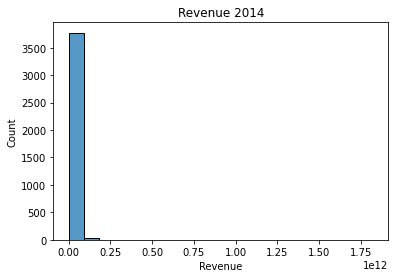

In [20]:
sns.histplot(x=dados_2014.Revenue,bins=20, palette= 'pastel').set_title("Revenue 2014")

Text(0.5, 1.0, 'ebit 2014')

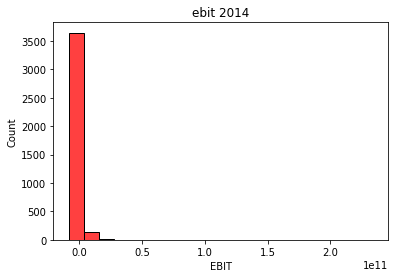

In [21]:
sns.histplot(x=dados_2014.EBIT,bins=20,palette='pastel',color='red').set_title("ebit 2014")

Text(0.5, 1.0, 'ebit per revenue 2014')

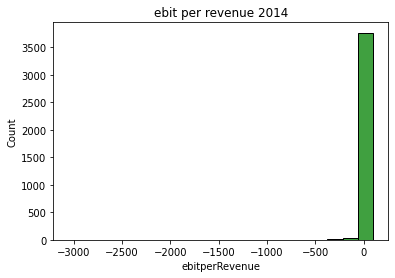

In [22]:
sns.histplot(x=dados_2014.ebitperRevenue,bins=20,palette='bright',color='green').set_title("ebit per revenue 2014")

Text(0.5, 1.0, 'distribuição ebit per revenue 2014')

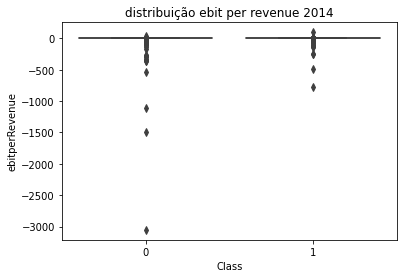

In [23]:
sns.boxplot(y=dados_2014.ebitperRevenue,x=dados_2014.Class).set_title("distribuição ebit per revenue 2014")

Text(0.5, 1.0, 'Correlação 2014')

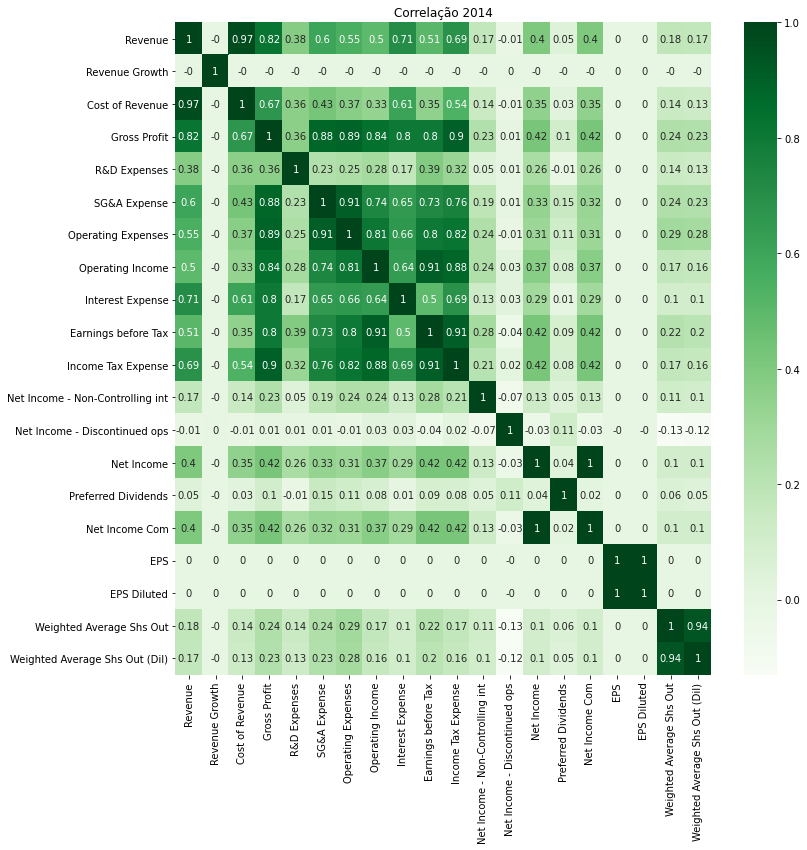

In [24]:
plt.figure(figsize=(12,12))
dados_sample = dados_2014.loc[:,:'Weighted Average Shs Out (Dil)']
corr = dados_sample.corr()
sns.heatmap(data=corr.round(2),annot=True,cmap='Greens').set_title("Correlação 2014")

Text(0.5, 1.0, 'Revenue 2015')

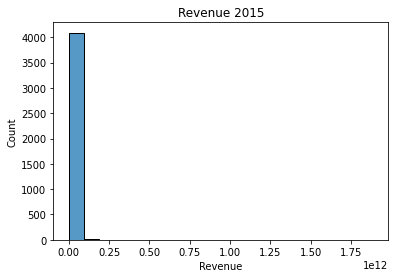

In [25]:
sns.histplot(x=dados_2015.Revenue,bins=20, palette= 'pastel').set_title("Revenue 2015")

Text(0.5, 1.0, 'ebit 2015')

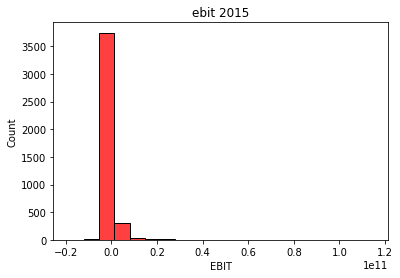

In [26]:
sns.histplot(x=dados_2015.EBIT,bins=20,palette='pastel',color='red').set_title("ebit 2015")

Text(0.5, 1.0, 'distribuição ebit per revenue 2015')

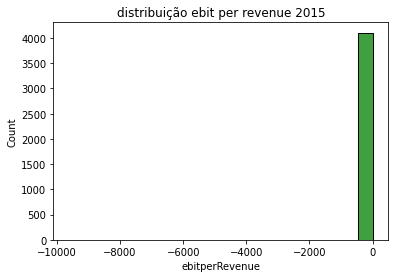

In [27]:
sns.histplot(x=dados_2015.ebitperRevenue,bins=20,palette='bright',color='green').set_title("distribuição ebit per revenue 2015")

Text(0.5, 1.0, 'distribuição ebit per revenue 2015')

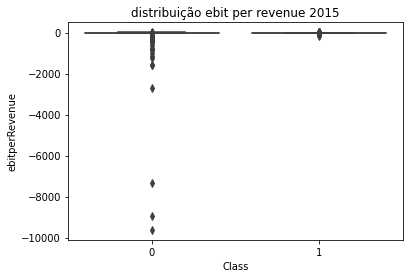

In [28]:
sns.boxplot(y=dados_2015.ebitperRevenue,x=dados_2015.Class).set_title("distribuição ebit per revenue 2015")

Text(0.5, 1.0, 'Correlação 2015')

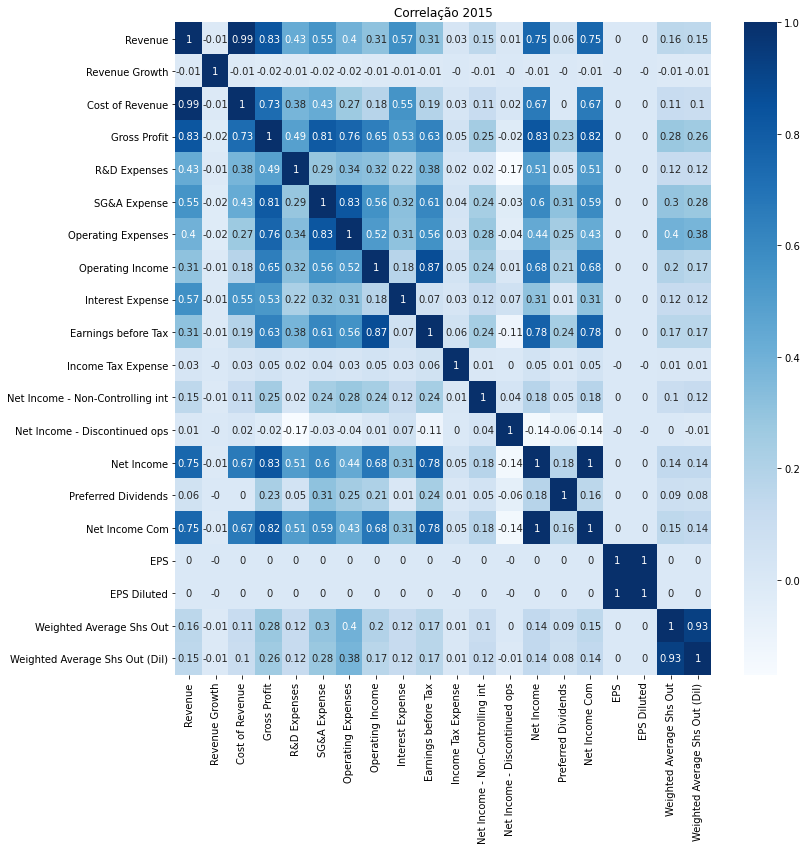

In [29]:
plt.figure(figsize=(12,12))
dados_sample = dados_2015.loc[:,:'Weighted Average Shs Out (Dil)']
corr_2015 = dados_sample.corr()
sns.heatmap(data=corr_2015.round(2),annot=True,cmap='Blues').set_title("Correlação 2015")

Text(0.5, 1.0, 'Revenue 2016')

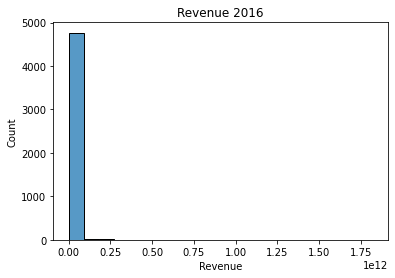

In [30]:
sns.histplot(x=dados_2016.Revenue,bins=20, palette= 'pastel').set_title("Revenue 2016")

Text(0.5, 1.0, 'ebit  2016')

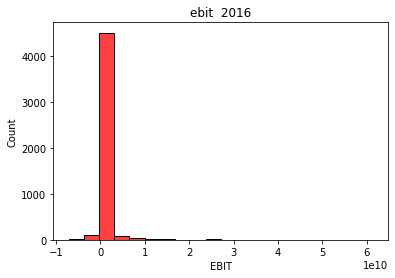

In [31]:
sns.histplot(x=dados_2016.EBIT,bins=20,palette='pastel',color='red').set_title("ebit  2016")

Text(0.5, 1.0, 'distribuição ebit per revenue 2016')

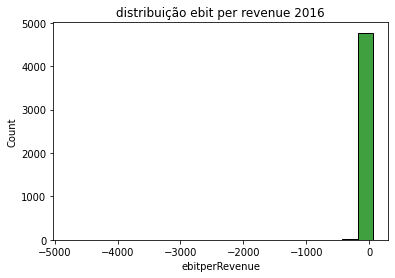

In [32]:
sns.histplot(x=dados_2016.ebitperRevenue,bins=20,palette='bright',color='green').set_title("distribuição ebit per revenue 2016")

Text(0.5, 1.0, 'distribuição ebit per revenue 2016')

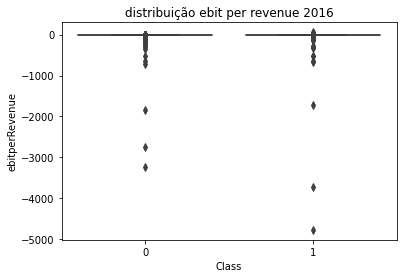

In [33]:
sns.boxplot(y=dados_2016.ebitperRevenue,x=dados_2016.Class).set_title("distribuição ebit per revenue 2016")

Text(0.5, 1.0, 'Correlação 2016')

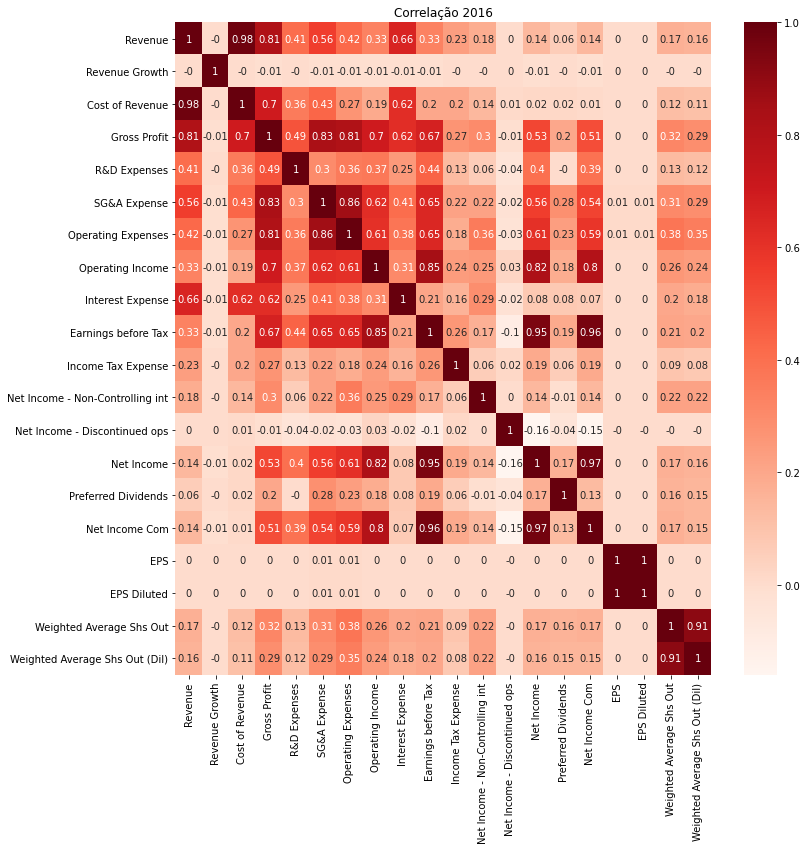

In [34]:
plt.figure(figsize=(12,12))
dados_sample = dados_2016.loc[:,:'Weighted Average Shs Out (Dil)']
corr_2016 = dados_sample.corr()
sns.heatmap(data=corr_2016.round(2),annot=True,cmap='Reds').set_title("Correlação 2016")

Como foi possível observar acima, alguns atributos das 3 tabelas possuem uma correlação acima de 80% e alguns atributos possuem um número muito expressivo de valores nulos. Partindo agora para a prática proposta em  si, foram encontradas duas funções do scikit learn para redução de dimensionalidade com PCA que serão utilizadas. A primeira função é a sklearn.decomposition.PCA, essa função utiliza o método "SVD" para realizar a projeção e reduzir a dimensionalidade entretanto, na descrição da função no scikit learn, ela não alcança uma boa performance em um conjunto de dados esparso e como observamos nosso conjunto de dados possui um valor grande de números 0 em alguns atributos. Para dataset's "esparsos" o scikit-learn recomenda uma segunda função chamada scikit.decomposition.truncatedSVD que trunca valores anormais possibilitando uma melhor performance com dataset's "esparsos". Ambas as funções necessitam de valores normalizados para trabalharem bem e pedem que indiquemos o número final de atributos que desejamos, portanto, os próximos passos seguidos serão o escalamento, e a aplicação do PCA para reduzir os atributos com base em uma variância de 95%. para o escalamento utilizaremos a função standardScaler do scikitlearn.preprocessing. 

In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [36]:
dados_2014_normalizados = dados_2014.drop(columns=['Class'])
mapper = DataFrameMapper([(dados_2014_normalizados.columns, StandardScaler())])
scaled_features = mapper.fit_transform(dados_2014_normalizados.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=dados_2014_normalizados.index, columns=dados_2014_normalizados.columns)
dados_2014_normalizados = scaled_features_df.copy()
dados_2014_normalizados['Class'] = dados_2014['Class']
dados_2014_normalizados.describe().round(3)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,...,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000,3808.000
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.429
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.495
min,-0.168,-0.022,-0.141,-0.286,-0.150,-0.195,-0.349,-1.985,-0.469,-3.419,-2.252,-10.092,-30.309,-2.019,-0.271,-2.018,-61.481,-61.542,-0.128,-0.123,-0.021,-50.862,-37.991,-48.566,-36.605,-53.055,-1.277,-1.736,-2.003,-47.501,-48.545,-0.109,-0.141,-0.254,-0.160,-0.072,-0.117,-0.140,-0.168,-0.128,...,-0.028,-2.491,-0.107,-0.018,-37.432,-0.026,-5.082,-2.232,-39.481,-14.951,-14.935,-0.044,-0.049,-0.666,-55.836,-61.609,-8.426,-5.962,-2.771,-8.865,-4.157,-3.933,-9.176,-4.471,-2.498

A caracteristica desta normalização feita pelo scikit learn é que a média foi trazida para próximo de 0 e o desvio padrão para próximo de 1.

In [37]:
dados_2015_normalizados = dados_2015.drop(columns=['Class'])
mapper = DataFrameMapper([(dados_2015_normalizados.columns, StandardScaler())])
scaled_features = mapper.fit_transform(dados_2015_normalizados.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=dados_2015_normalizados.index, columns=dados_2015_normalizados.columns)
dados_2015_normalizados = scaled_features_df.copy()
dados_2015_normalizados['Class'] = dados_2015['Class']
dados_2015_normalizados.describe().round(3)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
count,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,...,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000,4120.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.702
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.458
min,-0.156,-0.395,-0.212,-1.764,-0.153,-0.246,-1.348,-7.191,-3.480,-8.145,-64.055,-11.595,-40.343,-6.625,-0.660,-6.703,-62.822,-62.822,-0.127,-0.123,-0.084,-52.696,-46.915,-39.351,-47.419,-42.941,-3.722,-6.333,-6.580,-39.888,-40.039,-0.107,-0.071,-0.096,-0.112,-0.065,-0.119,-0.148,-0.211,-0.089,...,-0.025,-0.673,-0.078,-0.024,-40.984,-44.243,-54.978,-47.521,-49.348,-54.823,-55.056,-0.024,-0.022,-0.473,-61.881,-31.762,-8.788,-6.348,-3.515,-8.926,-5.882,-3.505,-12.331,-6.657,

In [38]:
dados_2016_normalizados = dados_2016.drop(columns=['Class'])
mapper = DataFrameMapper([(dados_2016_normalizados.columns, StandardScaler())])
scaled_features = mapper.fit_transform(dados_2016_normalizados.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=dados_2016_normalizados.index, columns=dados_2016_normalizados.columns)
dados_2016_normalizados = scaled_features_df.copy()
dados_2016_normalizados['Class'] = dados_2016['Class']
dados_2016_normalizados.head().round(3)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
0,1.958,-0.033,1.185,4.078,-0.149,5.599,3.839,5.334,1.192,6.498,1.575,0.666,-2.025,6.481,-0.09,6.350,0.023,0.023,1.441,1.333,0.509,-0.016,0.055,0.064,0.057,0.066,4.989,6.404,6.456,0.063,0.065,0.221,0.230,0.293,0.479,0.674,0.612,0.999,8.774,-0.099,...,-0.021,-0.171,-0.084,-0.017,0.029,-0.033,-0.014,0.003,0.024,0.024,0.023,-0.042,0.000,-0.036,-0.023,-0.008,-0.024,-0.290,-0.144,0.196,-0.045,-0.131,0.195,-0.371,-0.257,-0.185,-0.396,-0.294,0.67,0.313,0.187,-0.043,-0.067,-0.046,-0.010,-0.052,-0.045,-0.108,-0.018,1
1,0.108,-0.025,0.124,0.018,0.184,-0.044,0.061,-0.055,-0.202,-0.025,-0.001,-0.137,0.014,-0.010,-0.09,-0.012,0.023,0.023,-0.135,-0.130,-0.161,-0.393,0.054,0.063,0.056,0.064,-0.093,-0.061,-0.021,0.061,0.064,-0.062,-0.078,-0.086,-0.027,0.042,-0.078,-0.119,-0.154,-0.094,...,-0.019,0.000,-0.099,-0.017,0.029,-0.031,-0.020,0.004,0.017,0.013,0.013,-0.044,-0.052,-0.046,-0.023,0.019,0.000,0.000,1.054,0.000,-0.000,-0.038,-0.000,-0.000,2.931,0.000,-0.000,-0.000,0.00,0.000,-0.021,0.006,-0.049,-0.032,-0.003,-0.053,0.063,0.021,-0.019,1
2,3.399,-0.031,3.274,3.003,-0.149,5.289,4.232,1.260,0.954,1.285,0.463,-0.008,0.014,1.099,-0.09,1.075,0.023,0.023,0.435,0.395,-0.035,-0.421,0.054,0.062,0.056,0.064,1.440,1.401,1.085,0.061,0.064,-0.076,-0.082,-0.098,0.119,0.903,0.092,1.013,0.274,-0.099,...,0.050,-0.027,-0.047,-0.017,0.029,-0.032,-0.022,-0.003,0.016,0.014,0.014,-0.041,-0.052,0.138,-0.023,-0.008,0.782,0.547,0.045,1.098,0.602,0.557,1.192,0.885,0.303,0.606,0.555,0.640,0.15,1.098,1.052,-0.022,-0.028,-0.036,-0.006,-0.051,-0.045,-0.067,-0.020,0
3,0.517,-0.036,0.505,0.423,-0.149,1.159,0.725,-0.063,0.225,-0.105,-0.019,-0.087,-0.210,-0.092,-0.09,-0.092,0.023,0.023,-0.114,-0.111,-0.161,-0.393,0.054,0.062,0.056,0.065,-0.025,-0.057,-0.097,0.061,0.064,-0.083,-0.082,-0.103,0.100,0.355,-0.025,-0.022,0.135,-0.099,...,-0.019,-0.320,-0.129,-0.017,0.029,-0.035,-0.041,-0.063,-0.010,-0.022,-0.022,-0.037,0.000,-0.046,-0.023,0.042,-0.619,-0.483,-0.217,-0.190,0.793,-0.130,-3.200,-0.288,0.024,-1.968,-0.238,-0.129,0.15,-0.020,-0.021,-0.009,-0.070,-0.023,0.094,-0.047,-0.045,-0.185,-0.023,0
4,0.381,-0.032,0.305,0.534,-0.149,0.707,0.431,0.841,0.515,0.979,0.323,0.222,0.014,0.882,-0.09,0.862,0.023,0.023,0.209,0.189,0.288,-0.228,0.055,0.06

A seguir aplicaremos o algoritmo do PCA com parâmetro SVD aleatório, selecionando 110 atributos do dataset. Não utilizaremos o SVD_Truncated neste trabalho por apresentar os mesmos valores do PCA para o dataset trabalhado.  

In [89]:
pca_dados_2014 = dados_2014_normalizados.drop(columns=['Class']).copy()
pca = PCA(n_components=0.95)
principalComponents_2014 = pca.fit_transform(pca_dados_2014)
pca_dados_2014 = pd.DataFrame(data = principalComponents_2014)
pca_dados_2014.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
count,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,...,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,1.41,0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,4.81,3.53,3.04,2.72,2.65,2.60,2.48,2.23,2.13,1.94,1.93,1.88,1.84,1.83,1.80,1.79,1.72,1.71,1.61,1.56,1.55,1.53,1.52,1.51,1.50,1.49,1.46,1.46,1.45,1.43,1.43,1.42,1.42,1.42,0.00,1.41,1.41,1.40,1.39,1.37,...,1.13,1.12,1.08,1.07,1.06,1.06,1.04,1.03,1.02,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.98,0.97,0.96,0.96,0.94,0.93,0.93,0.93,0.92,0.91,0.91,0.90,0.89,0.88,0.86,0.85,0.85,0.84,0.82,0.82,0.80,0.80,0.78,0.74
min,-4.35,-7.20,-57.45,-54.91,-1.94,-38.93,-9.27,-29.99,-26.47,-23.17,-50.56,-30.00,-39.70,-36.45,-46.42,-49.73,-34.04,-13.04,-34.29,-19.71,-24.46,-27.03,-20.22,-24.08,-31.74,-15.27,-18.24,-33.43,-25.83,-25.44,-24.25,-21.87,-36.90,-27.25,1.41,-17.67,-31.51,-23.52,-21.24,-19.31,...,-28.71,-12.15,-9.61,-14.16,-13.39,-7.55,-10.13,-25.76,-14.98,-12.62,-19.16,-17.12,-17.08,-15.51,-16.68,-20.47,-17.91,-12.78,-17.76,-6.90,-9.99,-9.92,-19.82,-10.93,-13.39,-15.09,-11.77,-11.82,-14.30,-6.80,-12.60,-12.57,-12.54,-19.06,-9.95,-8.80,-13.36,-8.04,-8.00,-12.98
25%,-1.03,-0.34,-0.05,-0.22,-0.06,0.12,-0.14,-0.12,-0.35,-0.35,-0.04,-0.23,-0.16,-0.47,-0.21,-0.25,-0.26,-0.39,-0.14,-0.30,-0.30,-0.58,-0.24,-0.09,-0.17,-0.23,-0.19,-0.19,-0.19,-0.21,-0.14,-0.14,-0.17,-0.11,1.41,-0.10,-0.14,-0.33,-0.27,-0.33,...,-0.21,-0.49,-0.44,-0.28,-0.30,-0.32,-0.28,-0.22,-0.23,-0.14,-0.11,-0.09,-0.16,-0.15,-0.18,-0.17,-0.21,-0.28,-0.15,-0.31,-0.21,-0.19,-0.17,-0.22,-0.26,-0.22,-0.24,-0.21,-0.24,-0.25,-0.11,-0.27,-0.28,-0.16,-0.25,-0.23,-0.17,-0.19,-0.15,-0.12
50%,-0.83,-0.27,0.01,-0.17,-0.03,0.29,-0.03,-0.07,0.07,-0.11,0.10,-0.02,-0.06,-0.03,-0.00,-0.00,-0.07,0.03,-0.04,-0.01,-0.03,-0.10,-0.05,0.01,-0.01,-0.06,-0.03,0.01,0.03,0.04,0.01,-0.03,-0.05,0.02,1.41,-0.03,0.05,-0.08,-0.02,0.02,...,-0.01,-0.00,-0.08,0.01,-0.05,0.01,-0.03,0.03,0.01,-0.01,0.04,-0.03,-0.00,-0.02,-0.04,-0.02,-0.04,-0.01,0.02,-0.04,-0.01,-0.02,-0.01,-0.03,-0.06,0.01,0.03,0.06,0.01,-0.04,0.00,-0.04,-0.03,0.01,-0.02,-0.01,0.02,0.03,0.02,-0.00
75%,-0.48,-0.16,0.04,-0.10,-0.01,0.36,0.03,-0.01,0.36,0.19,0.21,0.17,0.06,0.48,0.20,0.22,0.13,0.45,0.05,0.24,0.23,0.36,0.15,0.10,0.14,0.17,0.12,0.26,0.26,0.22,0.17,0.08,0.08,0.12,1.41,0.03,0.24,0.18,0.18,0.33,...,0.16,0.42,0.32,0.24,0.28,0.22,0.27,0.23,0.24,0.12,0.18,0.05,0.15,0.12,0.12,0.13,0.14,0.29,0.23,0.23,0.20,0.14,0.14,0.17,0.21,0.24,0.27,0.30,0.25,0.21,0.09,0.17,0.25,0.18,0.23,0.20,0.18,0.20,0.18,0.13
max,147.80,137.46,161.32,146.21,162.85,77.94,92.18,115.80,51.13,76.78,76.21,80.50,91.46,39.85,59.07,53.74,88.37,54.83,64.92,32.74,41.39,38.87,36.54,74.70,51.98,30.65,70.04,46.61,35.05,31.52,34.36,75.27,43.86,51.34,1.42,73.89,32.13,31.73,34.68,19.57,...,29.02,13.94,15.75,22.65,22.01,22.16,14.22,26.48,19.19,41.70,25.53,49.24,22.53,26.86,29.02,34.82,23.02

Text(0.5, 1.0, 'Correlação 2014 após o PCA')

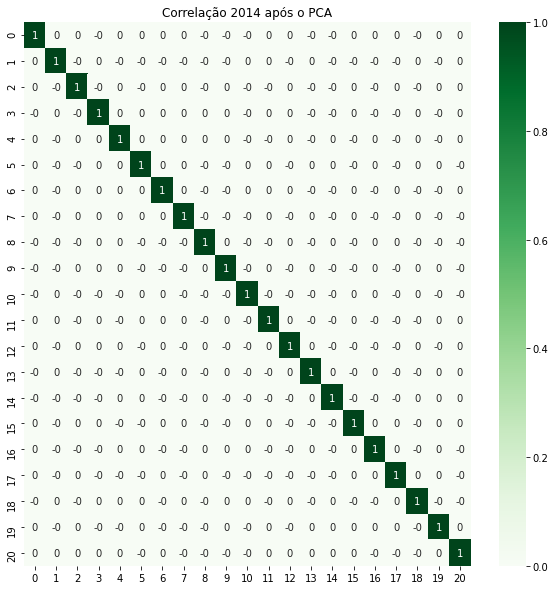

In [40]:
plt.figure(figsize=(10,10))
corr = pca_dados_2014.loc[:,:20].corr()
sns.heatmap(corr.round(3),cmap='Greens',annot=True).set_title("Correlação 2014 após o PCA")

In [41]:
pca_dados_2015 = dados_2015_normalizados.drop(columns=['Class']).copy()
pca = PCA(n_components=0.99)
Componentes_principais_2015 = pca.fit_transform(pca_dados_2015)
pca_dados_2015 = pd.DataFrame(data = Componentes_principais_2015)
pca_dados_2015.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
count,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,...,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00,4120.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,4.77,4.00,2.88,2.83,2.83,2.70,2.31,2.11,2.09,1.89,1.86,1.82,1.75,1.73,1.71,1.67,1.65,1.63,1.62,1.61,1.55,1.51,1.51,1.50,1.45,1.44,1.42,1.42,1.42,1.42,1.42,1.41,1.41,1.41,1.41,1.39,1.38,1.38,1.33,1.30,...,0.80,0.79,0.78,0.77,0.75,0.75,0.74,0.73,0.73,0.70,0.69,0.69,0.68,0.68,0.67,0.66,0.65,0.65,0.63,0.62,0.62,0.62,0.61,0.60,0.58,0.57,0.57,0.56,0.56,0.55,0.54,0.53,0.52,0.51,0.49,0.47,0.44,0.43,0.43,0.41
min,-6.22,-2.04,-50.70,-72.90,-1.22,-25.14,-52.08,-47.50,-5.23,-11.92,-11.14,-17.47,-61.44,-30.90,-40.32,-46.42,-40.94,-30.40,-19.78,-29.25,-41.14,-24.91,-27.67,-12.98,-38.42,-26.22,-33.35,-21.67,-20.25,-19.09,-44.36,-17.07,-26.52,-35.31,-26.47,-28.83,-17.17,-27.41,-32.98,-13.90,...,-7.56,-9.63,-10.33,-13.42,-8.84,-13.48,-5.97,-8.57,-7.29,-6.50,-10.41,-16.56,-12.34,-15.01,-11.19,-10.51,-6.00,-6.83,-7.35,-6.74,-6.24,-11.43,-13.11,-6.06,-11.62,-9.19,-13.30,-8.81,-12.45,-8.80,-8.56,-8.90,-6.15,-8.19,-7.05,-4.78,-9.15,-8.57,-6.70,-5.61
25%,-1.08,-0.24,-0.03,-0.04,-0.08,-0.11,-0.22,-0.11,-0.12,-0.10,-0.49,-0.54,-0.16,-0.20,-0.18,-0.11,-0.21,-0.15,-0.29,-0.36,-0.19,-0.12,-0.16,-0.11,-0.11,-0.12,-0.14,-0.08,-0.14,-0.17,-0.09,-0.13,-0.03,-0.07,-0.18,-0.07,-0.12,-0.08,-0.12,-0.37,...,-0.20,-0.25,-0.15,-0.17,-0.20,-0.14,-0.24,-0.21,-0.22,-0.13,-0.11,-0.13,-0.12,-0.13,-0.16,-0.13,-0.14,-0.20,-0.10,-0.14,-0.09,-0.10,-0.04,-0.14,-0.12,-0.10,-0.08,-0.10,-0.09,-0.08,-0.07,-0.06,-0.05,-0.06,-0.08,-0.06,-0.06,-0.07,-0.08,-0.10
50%,-0.94,-0.20,0.04,-0.03,-0.06,-0.08,0.22,-0.05,-0.08,-0.01,-0.08,0.05,-0.00,-0.01,-0.03,0.06,-0.00,-0.01,-0.10,-0.05,-0.00,0.01,-0.02,-0.03,-0.03,-0.01,-0.04,0.00,-0.02,-0.07,-0.03,-0.07,0.03,0.02,-0.01,0.02,-0.06,-0.04,-0.02,-0.06,...,-0.01,-0.00,-0.02,0.02,0.01,-0.00,-0.02,-0.02,-0.03,-0.00,0.01,-0.00,0.02,-0.01,0.01,-0.02,-0.00,-0.02,-0.01,-0.01,-0.01,-0.00,0.02,-0.02,-0.01,0.01,-0.01,-0.00,0.00,-0.01,0.02,-0.01,0.00,-0.01,-0.00,0.01,-0.01,-0.01,-0.01,-0.00
75%,-0.49,-0.14,0.17,-0.01,-0.04,-0.06,0.48,0.00,-0.03,0.07,0.35,0.55,0.18,0.18,0.13,0.25,0.24,0.10,0.10,0.29,0.17,0.14,0.11,0.05,0.05,0.10,0.07,0.06,0.06,0.04,0.03,-0.00,0.08,0.12,0.15,0.11,0.01,0.01,0.10,0.23,...,0.21,0.20,0.12,0.17,0.24,0.13,0.20,0.18,0.22,0.12,0.11,0.11,0.12,0.11,0.17,0.12,0.14,0.18,0.09,0.10,0.07,0.09,0.09,0.12,0.12,0.10,0.08,0.09,0.09,0.07,0.09,0.06,0.04,0.05,0.06,0.06,0.05,0.05,0.05,0.09
max,163.03,171.47,109.52,166.26,166.16,124.71,73.63,116.99,92.71,112.71,85.55,63.19,72.58,70.84,52.14,46.91,46.99,85.01,47.20,30.08,41.23,36.18,37.45,63.56,46.65,51.03,51.17,40.89,62.35,60.20,48.95,62.17,55.82,64.68,46.98,49.22,37.96,75.02,34.16,35.30,...,13.79,16.55,15.77,26.63,11.98,30.07,11.97,10.95,10.48,20.48,16.99,18.30,12.

Text(0.5, 1.0, 'Correlação 2015 após o PCA')

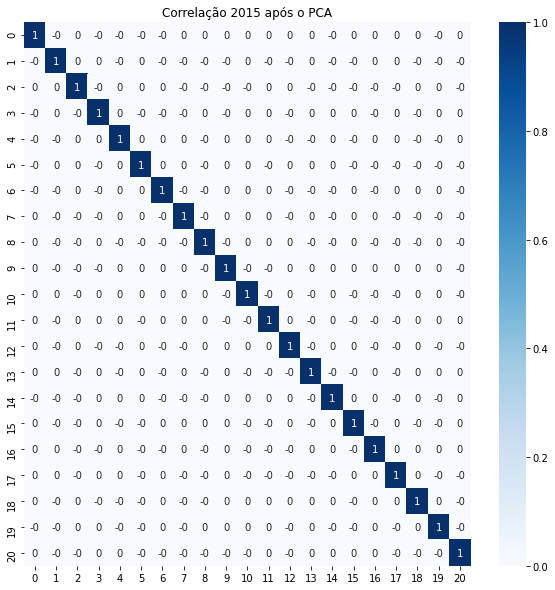

In [42]:
plt.figure(figsize=(10,10))
corr_PCA_2015 = pca_dados_2015.loc[:,:20].corr()
sns.heatmap(corr_PCA_2015.round(3),cmap='Blues',annot=True).set_title("Correlação 2015 após o PCA")

In [43]:
pca_dados_2016 = dados_2016_normalizados.drop(columns=['Class']).copy()
pca = PCA(n_components=0.95)
Componentes_principais_2016 = pca.fit_transform(pca_dados_2016)
pca_dados_2016 = pd.DataFrame(data = Componentes_principais_2016)
pca_dados_2016.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
count,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,...,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00,4797.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,4.81,3.62,3.02,2.90,2.83,2.60,2.26,2.00,1.91,1.79,1.76,1.74,1.73,1.72,1.69,1.68,1.63,1.62,1.52,1.49,1.49,1.48,1.46,1.45,1.44,1.43,1.42,1.41,1.40,1.40,1.38,1.37,1.37,1.36,1.36,1.34,1.33,1.32,1.32,1.28,...,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.98,0.98,0.98,0.98,0.97,0.96,0.96,0.95,0.95,0.94,0.93,0.92,0.92,0.91,0.91,0.90,0.88,0.87,0.86,0.85,0.85,0.84,0.83,0.82,0.81,0.81,0.79,0.79,0.78,0.77,0.76,0.75,0.74
min,-5.53,-18.23,-54.14,-10.25,-1.99,-59.08,-11.92,-4.28,-21.64,-14.38,-23.70,-18.63,-52.32,-31.79,-24.73,-41.48,-16.43,-28.48,-13.69,-15.55,-23.04,-31.95,-27.50,-18.84,-19.99,-23.31,-12.47,-29.82,-25.22,-34.20,-21.98,-24.68,-31.37,-20.54,-13.82,-24.66,-40.53,-14.96,-27.53,-15.27,...,-30.73,-21.42,-24.84,-15.36,-28.19,-15.62,-10.01,-22.91,-10.34,-18.06,-12.84,-21.22,-24.10,-18.37,-16.21,-23.54,-16.75,-15.91,-13.54,-17.83,-19.65,-26.77,-13.98,-11.87,-15.07,-23.34,-12.34,-11.17,-9.87,-9.46,-15.60,-12.07,-13.94,-14.98,-13.86,-12.24,-29.22,-7.04,-9.32,-9.34
25%,-1.25,-0.31,-0.13,-0.12,-0.08,-0.06,-0.07,-0.19,-0.65,-0.11,-0.27,-0.19,-0.15,-0.15,-0.25,-0.14,-0.11,-0.32,-0.33,-0.26,-0.24,-0.38,-0.19,-0.29,-0.32,-0.29,-0.27,-0.14,-0.10,-0.11,-0.14,-0.30,-0.15,-0.09,-0.33,-0.32,-0.10,-0.29,-0.17,-0.23,...,-0.08,-0.08,-0.10,-0.10,-0.12,-0.13,-0.12,-0.08,-0.04,-0.20,-0.24,-0.12,-0.17,-0.11,-0.18,-0.13,-0.16,-0.18,-0.16,-0.11,-0.16,-0.13,-0.17,-0.23,-0.19,-0.11,-0.19,-0.19,-0.21,-0.13,-0.16,-0.19,-0.19,-0.18,-0.27,-0.29,-0.12,-0.19,-0.19,-0.15
50%,-1.04,-0.27,-0.04,-0.08,-0.03,0.18,-0.04,-0.10,-0.00,-0.02,-0.02,0.00,0.00,-0.01,-0.04,-0.01,-0.03,-0.01,-0.03,-0.03,-0.00,-0.04,0.00,-0.01,-0.00,-0.02,-0.09,-0.01,0.03,0.00,0.02,-0.00,-0.02,0.00,-0.01,0.00,0.01,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.01,-0.01,-0.00,0.00,-0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.03,-0.01,-0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.02,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,0.00,0.00
75%,-0.18,-0.13,0.05,-0.02,-0.00,0.42,-0.01,0.00,0.58,0.04,0.15,0.16,0.15,0.07,0.16,0.07,0.03,0.21,0.17,0.14,0.20,0.17,0.15,0.18,0.24,0.13,0.04,0.07,0.21,0.19,0.27,0.27,0.06,0.10,0.17,0.37,0.20,0.23,0.15,0.21,...,0.06,0.09,0.13,0.09,0.06,0.09,0.07,0.13,0.02,0.12,0.22,0.11,0.19,0.08,0.19,0.14,0.13,0.17,0.28,0.07,0.13,0.10,0.19,0.24,0.21,0.13,0.17,0.22,0.20,0.14,0.12,0.12,0.16,0.20,0.24,0.20,0.12,0.18,0.19,0.16
max,125.00,134.27,136.74,166.71,195.80,90.26,131.85,108.32,25.44,107.44,75.13,65.39,72.98,79.12,78.16,74.35,84.62,31.88,52.28,72.17,44.45,40.87,35.98,37.95,30.85,55.05,45.07,51.80,57.91,47.22,31.71,37.33,48.99,65.56,29.35,29.64,44.59,30.76,31.07,27.04,...,37.80,31.23,32.76,29.14,32.68,35.04,37.38,23.40,62.81,23.21,26.61,26.00,24.62,

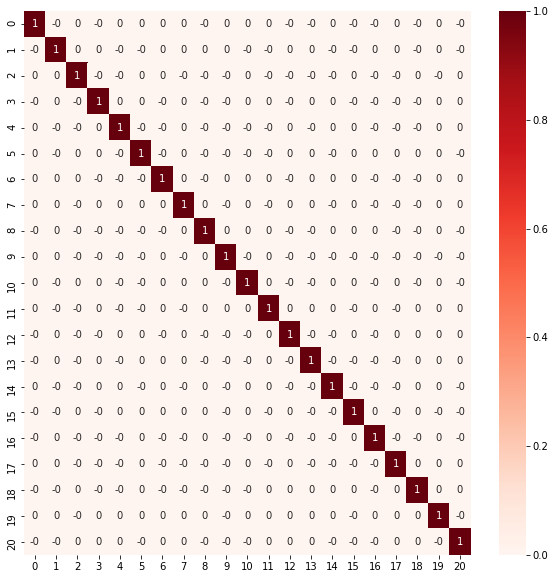

In [44]:
plt.figure(figsize=(10,10))
corr_PCA_2016 = pca_dados_2016.loc[:,:20].corr()
sns.heatmap(corr_PCA_2016.round(2),cmap='Reds',annot=True)

Como pudemos abservar acima, o algoritmo de PCA realizou a transformação dos nossos dados reduzindo a dimensionalidade para que os dados transformados  encontrar um covariância de 95%. Para os dados de 2014 encontramos um número de 89 atributos, para os dados de 2015 o PCA retornou 96 atributos, e dos dados de 2016 o PCA retornou 102 atributos. Como podemos notar, os atributos retornados pelo PCA não possuem correlação, acima fizemos três gráficos de calor para visualizarmos a matriz de correlação dos 20 primeiros atributos retornados.   

## Extra
---
Vamos criar um modelo de regressão logística para os dados de 2014 e vamos tentar visualizar como o modelo se comporta com os dados iniciais, os dados normalizados e os dados retornados pelo PCA.    

## 1. Dados iniciais
---

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [46]:
X=dados_2014.drop(columns=['Class'])
x_treino,x_teste,y_treino,y_teste = train_test_split(X,dados_2014['Class'],
                                                     test_size=0.3,random_state=0,stratify=dados_2014['Class'])
logisticRegression_for_original = LogisticRegression(max_iter=100000)
logisticRegression_for_original.fit(x_treino,y_treino) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=100000)

In [47]:
X=dados_2014_normalizados.drop(columns=['Class'])
x_treino,x_teste,y_treino,y_teste = train_test_split(X,dados_2014_normalizados['Class'],
                                                     test_size=0.3,random_state=0,stratify=dados_2014_normalizados['Class'])
logisticRegression_for_norma = LogisticRegression(max_iter=1000)
logisticRegression_for_norma.fit(x_treino,y_treino)

LogisticRegression(max_iter=1000)

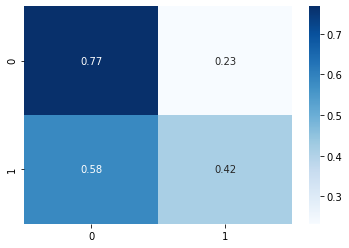

In [48]:
y_pred = logisticRegression_for_norma.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste,y_pred,normalize='true')
sns.heatmap(data=matriz_confusao,cmap='Blues',annot=True)

In [49]:
X=pca_dados_2014
x_treino,x_teste,y_treino,y_teste = train_test_split(X,dados_2014_normalizados['Class'],
                                                     test_size=0.3,random_state=0,stratify=dados_2014_normalizados['Class'])
logisticRegression_for_pca = LogisticRegression(max_iter=1000)
logisticRegression_for_pca.fit(x_treino,y_treino)

LogisticRegression(max_iter=1000)

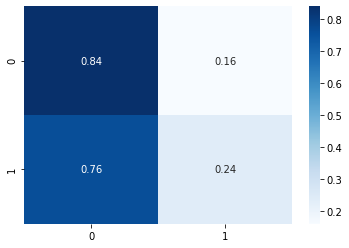

In [50]:
y_pred = logisticRegression_for_pca.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste,y_pred,normalize='true')
sns.heatmap(data=matriz_confusao,cmap='Blues',annot=True)

In [59]:
from sklearn import tree
X=dados_2014_normalizados.drop(columns=['Class'])
x_treino,x_teste,y_treino,y_teste = train_test_split(X,dados_2014_normalizados['Class'],
                                                     test_size=0.3,random_state=0,stratify=dados_2014_normalizados['Class'])
Decision_tree_for_2014 = tree.DecisionTreeClassifier()
Decision_tree_for_2014.fit(x_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[221] <= -0.024\ngini = 0.49\nsamples = 2665\nvalue = [1521, 1144]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1521\nvalue = [1521, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1144\nvalue = [0, 1144]')]

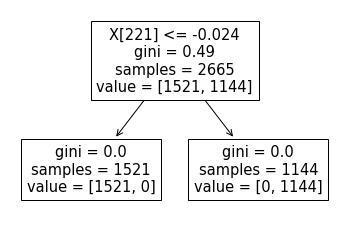

In [60]:
tree.plot_tree(Decision_tree_for_2014)

In [64]:
from sklearn.metrics import accuracy_score
y_pred = Decision_tree_for_2014.predict(x_teste)
acuracia = accuracy_score(y_true=y_teste,y_pred=y_pred)
print(acuracia)

1.0


Text(0.5, 1.0, 'Matriz de confusão para a arvore de decisão')

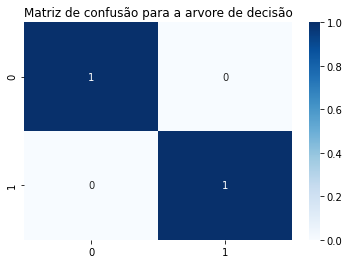

In [70]:
confusion_dados_2014 = confusion_matrix(y_pred=y_pred,y_true=y_teste,normalize='true')
sns.heatmap(confusion_dados_2014,cmap='Blues',annot=True).set_title("Matriz de confusão para a arvore de decisão")

In [91]:
X=pca_dados_2014
x_treino_pca,x_teste_pca,y_treino_pca,y_teste_pca = train_test_split(X,dados_2014_normalizados['Class'],
                                                     test_size=0.3,random_state=0,stratify=dados_2014_normalizados['Class'])
Decision_tree_for_pca_2014 = tree.DecisionTreeClassifier()
Decision_tree_for_pca_2014.fit(x_treino_pca,y_treino_pca)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
y_pred_pca = Decision_tree_for_pca_2014.predict(x_teste_pca)
acuracia = accuracy_score(y_true=y_teste_pca,y_pred=y_pred_pca)
print(acuracia)

0.5643044619422573


Aparentemente, para esse conjunto de dados o método PCA para redução de dimensionalidades não foi eficiente, já que nenhum modelo presente no pycaret conseguiu apresentar boas métricas. 